<a href="https://colab.research.google.com/github/shazaelmorsh/Machine-Learning-Concepts/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries
We will import numpy for computing and Matplotlib for plotting data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use() TO-DO

Create one dimensional arrays to plot

In [2]:
x_train = np.array([1,2])
y_train = np.array([300,500])
print(f'x_train = {x_train}')
print(f'x_train = {y_train}')

# check number of examples
print(f'Number of training examples are {x_train.shape[0]}')

x_train = [1 2]
x_train = [300 500]
Number of training examples are 2


Plotting the data

Text(0, 0.5, 'price of the house')

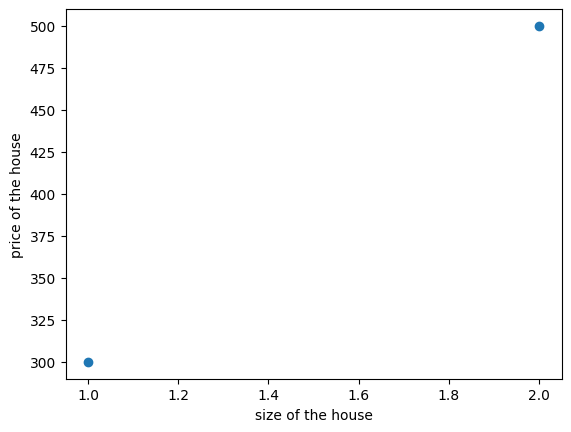

In [3]:
#plot the data points
plt.scatter(x_train,y_train)
plt.xlabel("size of the house")
plt.ylabel("price of the house")

# Linear Regression

##Single Feature

###Linear Function: Single Feature

Linear Function : $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

In [4]:
#initialize w and b with random values
w = 100
b = 100
def compute_linear_model(x,w,b):
  f_wb = np.zeros(x.shape[0])
  #looping over training examples
  for i in range(f_wb.shape[0]):
    f_wb[i] = w * x[i] + b
  return f_wb

y_prediction = compute_linear_model(x_train,w,b)

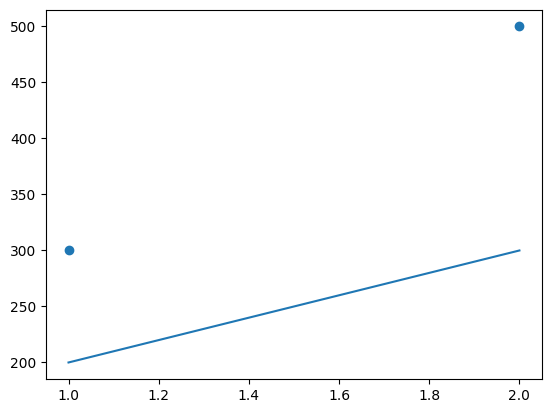

In [5]:
plt.plot(x_train,y_prediction, label = "our prediction")
plt.scatter(x_train,y_train, label = "actual value")

### Cost Function: Single Feature

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

In [6]:
def compute_cost(x,y,w,b):
  cost_sum = 0
  y_prediction = compute_linear_model(x,w,b)
  for i in range(x.shape[0]):
    cost_sum = cost_sum + (y_prediction[i] - y[i])**2
  cost_sum = cost_sum / 2*x.shape[0]
  return cost_sum

print("Cost is equal ",compute_cost(x_train,y_train,200,100))

Cost is equal  0.0


### Gradient Descent: Single Feature


$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [7]:
#Gradient
def compute_gradient(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  y_prediction = compute_linear_model(x,w,b)
  for i in range(m):
    dj_dw = (y_prediction[i] - y[i]) * x[i]
    dj_db = (y_prediction[i] - y[i])
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw , dj_db

#Gradient Descent
def gradient_descent(x,y,w,b,alpha,num_iter, cost_function = compute_cost, gradient_function = compute_gradient):
  p_history = []
  j_history = []
  for i in range(num_iter):
    dj_dw , dj_db = gradient_function(x,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    if i < 100000:
      j_history.append(cost_function(x,y,w,b))
      p_history.append({w,b})
  return w,b, j_history, p_history


In [8]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

(w,b) found by gradient descent: (200.0000,100.0000)


## Vectorization

moving on having more than 1 feature where we will need to make use of vectorization

In [9]:
#observing the change when creating more than 1-D array
arr = np.array([1,2])
arr=arr.reshape(-1,1)
print(arr)
print(arr.shape)
# print(arr.shape[0])
arr = np.array([[1, 2],[3,4],[2,4]])
print(arr)
print(arr.shape)
# print(arr.shape[0])
#shape is rows x columns

[[1]
 [2]]
(2, 1)
[[1 2]
 [3 4]
 [2 4]]
(3, 2)


In [10]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
print(x_train.shape)
print(x_train)
print(y_train.shape)
print(y_train)

(3, 4)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
(3,)
[460 232 178]


##Multiple Features

### Linear Function: Multiple features

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$
where $\cdot$ is a vector `dot product`

In [11]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
def compute_linear_model_multiple_features(x,w,b):
  f_wb = np.zeros(x.shape[0])
  #looping over training examples
  for i in range(x.shape[0]):
    f_wb[i] = np.dot(x[i] , w) + b
  return f_wb

print(compute_linear_model_multiple_features(x_train,w_init,b_init))

[459.99999762 231.99999837 177.99999899]


### Cost function: multiple feature

The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$


In [12]:
def compute_cost_multiple_features(x,y,w,b):
  m = x.shape[0]
  y_pred = compute_linear_model_multiple_features(x,w,b)
  cost = 0
  for i in range(m):
    cost = cost + (y_pred[i] - y[i])**2
  cost = cost/ (2 * m)
  return cost

In [13]:
#testing my functions
cost = compute_cost_multiple_features(x_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 1.5578904428966628e-12


### Gradient descent: multiple feature

Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value

In [14]:
#Gradient
def compute_gradient_multiple_features(x,y,w,b):
  y_pred = compute_linear_model_multiple_features(x,w,b)
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  for i in range(m):
    dj_dw = dj_dw + (y_pred[i] - y[i]) * x[i]
    dj_db = dj_db + (y_pred[i] - y[i])
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw , dj_db

#Gradient Descent
def gradient_descent_multiple_features(x,y,w,b,alpha,num_iter, cost_function = compute_cost_multiple_features, gradient_function = compute_gradient_multiple_features):
  j_history = []
  for i in range(num_iter):
    dj_dw , dj_db = gradient_function(x,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i <10000:
      j_history.append(cost_function(x,y,w,b))
  return w,b,j_history


In [15]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient_multiple_features(x_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]
dj_dw at initial w,b: 
 -1.6739251501955248e-06


In [16]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7
# run gradient descent
w_final, b_final, J_hist = gradient_descent_multiple_features(x_train, y_train, initial_w, initial_b,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


## Regularization

Graph before regularization

In [17]:
from scipy.stats import norm
#TO-DO
def norm_plot(ax, data):
    scale = (np.max(data) - np.min(data))*0.2
    x = np.linspace(np.min(data)-scale,np.max(data)+scale,50)
    _,bins, _ = ax.hist(data, x, color="xkcd:azure")
    #ax.set_ylabel("Count")

    mu = np.mean(data);
    std = np.std(data);
    dist = norm.pdf(bins, loc=mu, scale = std)

    axr = ax.twinx()
    axr.plot(bins,dist, color = "orangered", lw=2)
    axr.set_ylim(bottom=0)
    axr.axis('off')

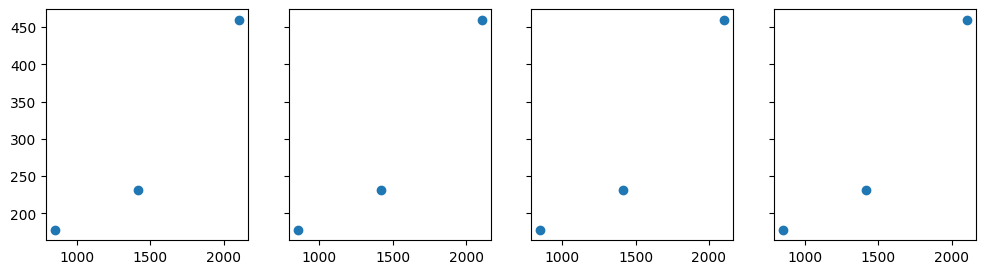

In [18]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
ax[0].scatter(x_train[:,0],y_train)
ax[1].scatter(x_train[:,0],y_train)
ax[2].scatter(x_train[:,0],y_train)
ax[3].scatter(x_train[:,0],y_train)


- Feature scaling, essentially dividing each positive feature by its maximum value, or more generally, rescale each feature by both its minimum and maximum values using (x-min)/(max-min). Both ways normalizes features to the range of -1 and 1, where the former method works for positive features which is simple and serves well for the lecture's example, and the latter method works for any features.
- Mean normalization: $x_i := \dfrac{x_i - \mu_i}{max - min} $
- Z-score normalization.
To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

###z-score normalization

In [19]:
def zscore_normalize_features(x):
  mu = np.mean(x,0)
  sig = np.std(x,0)
  x_norm = (x - mu)/sig
  # return x_norm, mu , sig
  return x_norm
# X_norm, X_mu, X_sigma = zscore_normalize_features(x_train)
X_norm = zscore_normalize_features(x_train)
print("before normalization")
print(x_train)
print("after normalization")
print(X_norm)

before normalization
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
after normalization
[[ 1.26311506  1.33630621 -0.70710678  1.22474487]
 [-0.08073519 -0.26726124  1.41421356  0.        ]
 [-1.18237987 -1.06904497 -0.70710678 -1.22474487]]


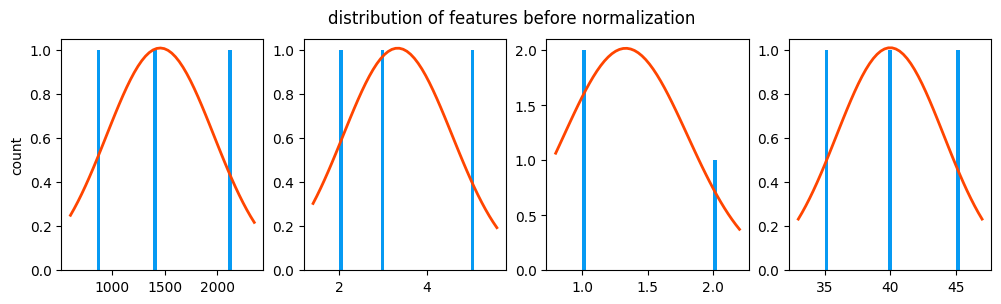

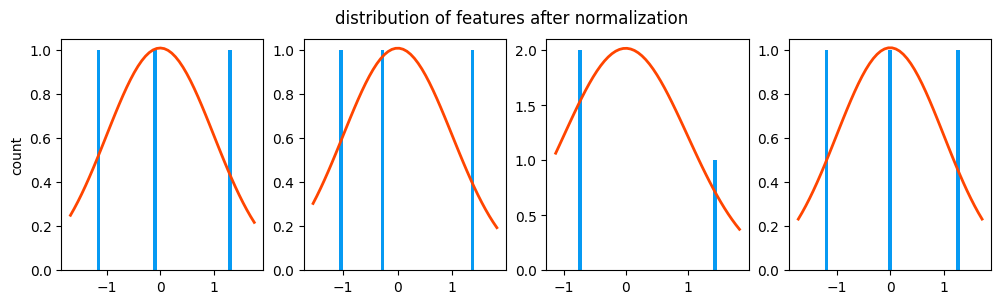

In [20]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3))
for i in range(len(ax)):
    norm_plot(ax[i],x_train[:,i])
ax[0].set_ylabel("count");
fig.suptitle("distribution of features before normalization")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(12,3))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
ax[0].set_ylabel("count");
fig.suptitle("distribution of features after normalization")

plt.show()

##Feature Engineering

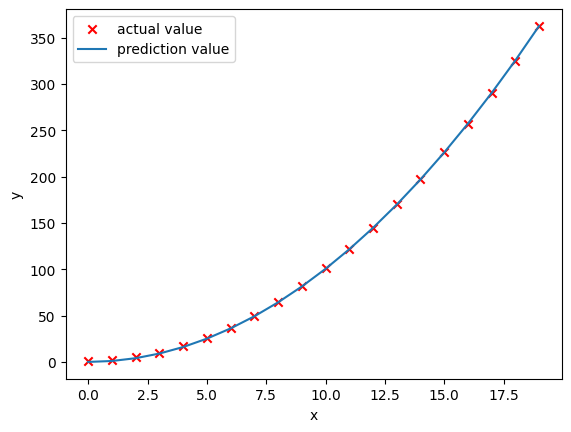

In [21]:
#creating random dataset
# y = x^2 * w + b instead of y = x * w + b
x = np.arange(0,20,1)
y = 1 + x**2
x = x.reshape(-1,1)
x = np.c_[x, x**2]
# X = x ** 2
model_w,model_b, J_hist = gradient_descent_multiple_features(x[:,1],y,0,0,0.00001,5000)
# print(x)
# print(x[:,1])

plt.scatter(x[:,0],y, marker='x',c='r', label="actual value")
plt.plot(x[:,0], np.dot(x[:,1],model_w) + model_b,label="prediction value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

6


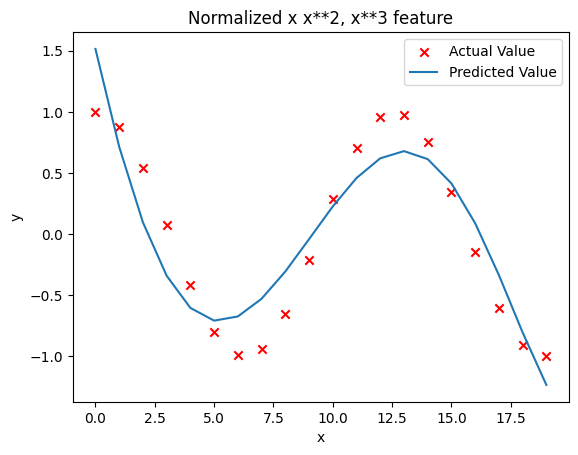

In [22]:
x = np.arange(0,20,1)
# x = x.reshape(-1,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6]
print(X.shape[1])
m = X.shape[1]
X = zscore_normalize_features(X)
model_w,model_b, _ = gradient_descent_multiple_features(X, y,np.zeros(m),0,0.34,20000)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

## Scikit-Learn: Linear Regression

In [23]:
#import the library
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [24]:
#Create database
x = np.arange(0,20,1)
y_train = x * 10
x = np.c_[x, x**2, x**3,x**4]
X_features = ['size(sqft)','bedrooms','floors','age']


###SGD Regression

In [25]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x)
sgdr = SGDRegressor(max_iter=1000)
# Train the model
sgdr.fit(x_norm, y_train)
# get the weight and bias values
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
# make a prediction using sgdr.predict()
y_pred_sgd = sgdr.predict(x)
# make a prediction using w,b.
y_pred = np.dot(x, w_norm) + b_norm

###Linear Regression

In [26]:
#get instance of the model
linear_model = LinearRegression()
#train the model
linear_model.fit(x,y_train)
#get the weight and bias values
b = linear_model.intercept_
w = linear_model.coef_
# check our prediction
y_pred = linear_model.predict(x)


#Classification

In [27]:
#create training examples
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
x_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]]) # multiple features
y_train2 = np.array([0, 0, 0, 1, 1, 1])

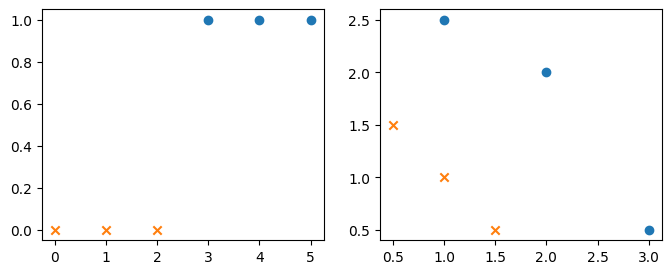

In [28]:
#create 2 plots
pos = y_train == 1
neg = y_train == 0
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].scatter(x_train[y_train == 1],y_train[y_train == 1],marker="o")
ax[0].scatter(x_train[y_train == 0],y_train[y_train == 0],marker="x")
ax[1].scatter(x_train2[pos,0],x_train2[pos,1],marker="o")
ax[1].scatter(x_train2[neg,0],x_train2[neg,1],marker="x")

##Logistic Regression

###Sigmoid function

we would like the predictions of our classification model to be between 0 and 1 since our output variable $y$ is either 0 or 1.

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$


In [29]:
def sigmoid(z):
  g = 1 / (1 + np.exp(-z))
  return g

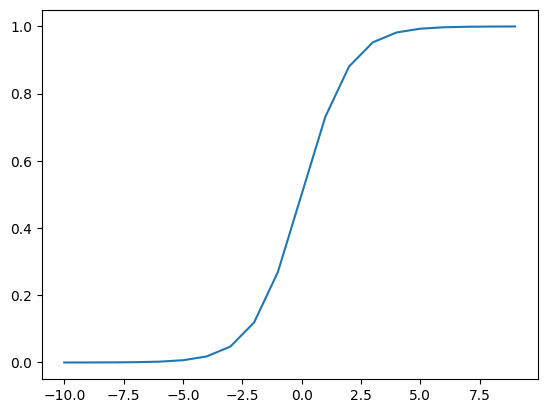

In [30]:
z = np.arange(-10,10)
y = sigmoid(z)
plt.plot(z,y)

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$

  for multiple features we can use the dot produt
    $$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$
  
  
 * We interpret the output of the model ($f_{\mathbf{w},b}(x)$) as the probability that $y=1$ given $\mathbf{x}$ and parameterized by $\mathbf{w}$ and $b$.
* Therefore, to get a final prediction ($y=0$ or $y=1$) from the logistic regression model, we can use the following heuristic -

  if $f_{\mathbf{w},b}(x) >= 0.5$, predict $y=1$
  
  if $f_{\mathbf{w},b}(x) < 0.5$, predict $y=0$



###Cost Function

This is defined:
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.

The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
    
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

Cost function:

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

In [65]:
def compute_cost_logistic(x,y,w,b):
  m = x.shape[0]
  cost = 0
  for i in range(m):
    y_pred = sigmoid(np.dot(w,x[i]) + b)
    cost += -y[i]*np.log(y_pred) - (1-y[i])*np.log(1-y_pred)
  cost = cost/m
  return cost

In [66]:
#creating the dataset
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(x_train, y_train, w_tmp, b_tmp))

[0.5 1.5]
0.2689414213699951
[1. 1.]
0.2689414213699951
[1.5 0.5]
0.2689414213699951
[3.  0.5]
0.6224593312018546
[2. 2.]
0.7310585786300049
[1.  2.5]
0.6224593312018546
0.36686678640551745


###Logistic Gradient Descent


Recall the gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    

In [33]:
#Gradient
def compute_gradient_multiple_features_logitic(x,y,w,b):
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0
  y_pred = sigmoid(np.dot(x,w) + b)
  for i in range(m):
    dj_dw = dj_dw + (y_pred[i] - y[i]) * x[i]
    dj_db = dj_db + (y_pred[i] - y[i])
  dj_dw = dj_dw / m
  dj_db = dj_db / m
  return dj_dw , dj_db

#Gradient Descent
def gradient_descent_multiple_features_logistic(x,y,w,b,alpha,num_iter , gradient_function = compute_gradient_multiple_features_logitic):
  for i in range(num_iter):
    dj_dw , dj_db = gradient_function(x,y,w,b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db

  return w,b

In [34]:
#testing our code
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp  = np.zeros_like(X_tmp[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out = gradient_descent_multiple_features_logistic(X_tmp, y_tmp, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019839


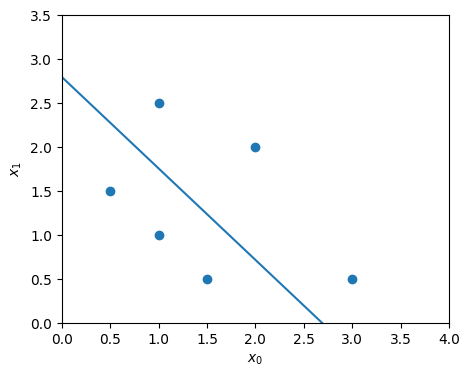

In [35]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability
# plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
# plot_data(X_train,y_train,ax)
plt.scatter(X_tmp[:,0],X_tmp[:,1])
# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0])

###Scikit-learn: Logistic Regression

In [36]:
#import library
from sklearn.linear_model import LogisticRegression

#create dataset
x = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])
#create instance from model
lr_model = LogisticRegression()
lr_model.fit(x,y)
#make a prediction
y_pred = lr_model.predict(x)
print("Prediction on training set:", y_pred)
#calculate accuracy
print("Accuracy on training set:", lr_model.score(x, y))


Prediction on training set: [0 0 0 1 1 1]
Accuracy on training set: 1.0


##Softmax regression

generalization of logistic regression

###softmax function

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}

In [130]:
#z is the linear function
def compute_softmax(z):
  z= np.dot(x[i],w) + b
  # print("z,",z)
  ez = np.exp(z)
  # print("ez,",ez)
  # print("sum,",np.sum(ez))
  a = ez/np.sum(ez)
  # print("a,",a)
  return a

###cost function

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples.


Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise.
$$
\mathbf{1}\{y = n\} = \begin{cases}
1, & \text{if } y = n.\\
0, & \text{otherwise}.
\end{cases}
$$

Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where M is the number of examples, N is the number of outputs. This is the average of all the losses.

In [133]:
def compute_cost_softmax(x,y,w,b):
  m = x.shape[0]
  # print(m)
  cost = 0
  for i in range(m):
    y_pred = compute_softmax(np.dot(x[i],w) + b)
    # print("propability for each class: ", y_pred)
    #we should only send the w and b assossiated with the y, or select the a assossiate with the real y
    cost += -np.log(y_pred[y[i]])
  cost = cost/m
  return cost

In [134]:
#creating the dataset
# 6 training sets and 2 number of outputs
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)
w = np.array([[1,1],[2,2]])
b = np.array([-3,-2])
print(compute_cost_softmax(x_train, y_train, w, b))

0.8132616875182227
